# Supply Chain Analysis
ref : https://www.kaggle.com/datasets/amirmotefaker/supply-chain-dataset/data

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [3]:
# Read the data file
df_input = pd.read_csv("supply_chain_data.csv")

In [4]:
# sample data frame input
df_input.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [5]:
# Shape of the data file
df_input.shape

(100, 24)

There are 100 observations and 24 features

In [6]:
# Data file fields
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [7]:
# Is there any null value fields ?
df_input.isnull().sum().any()

False

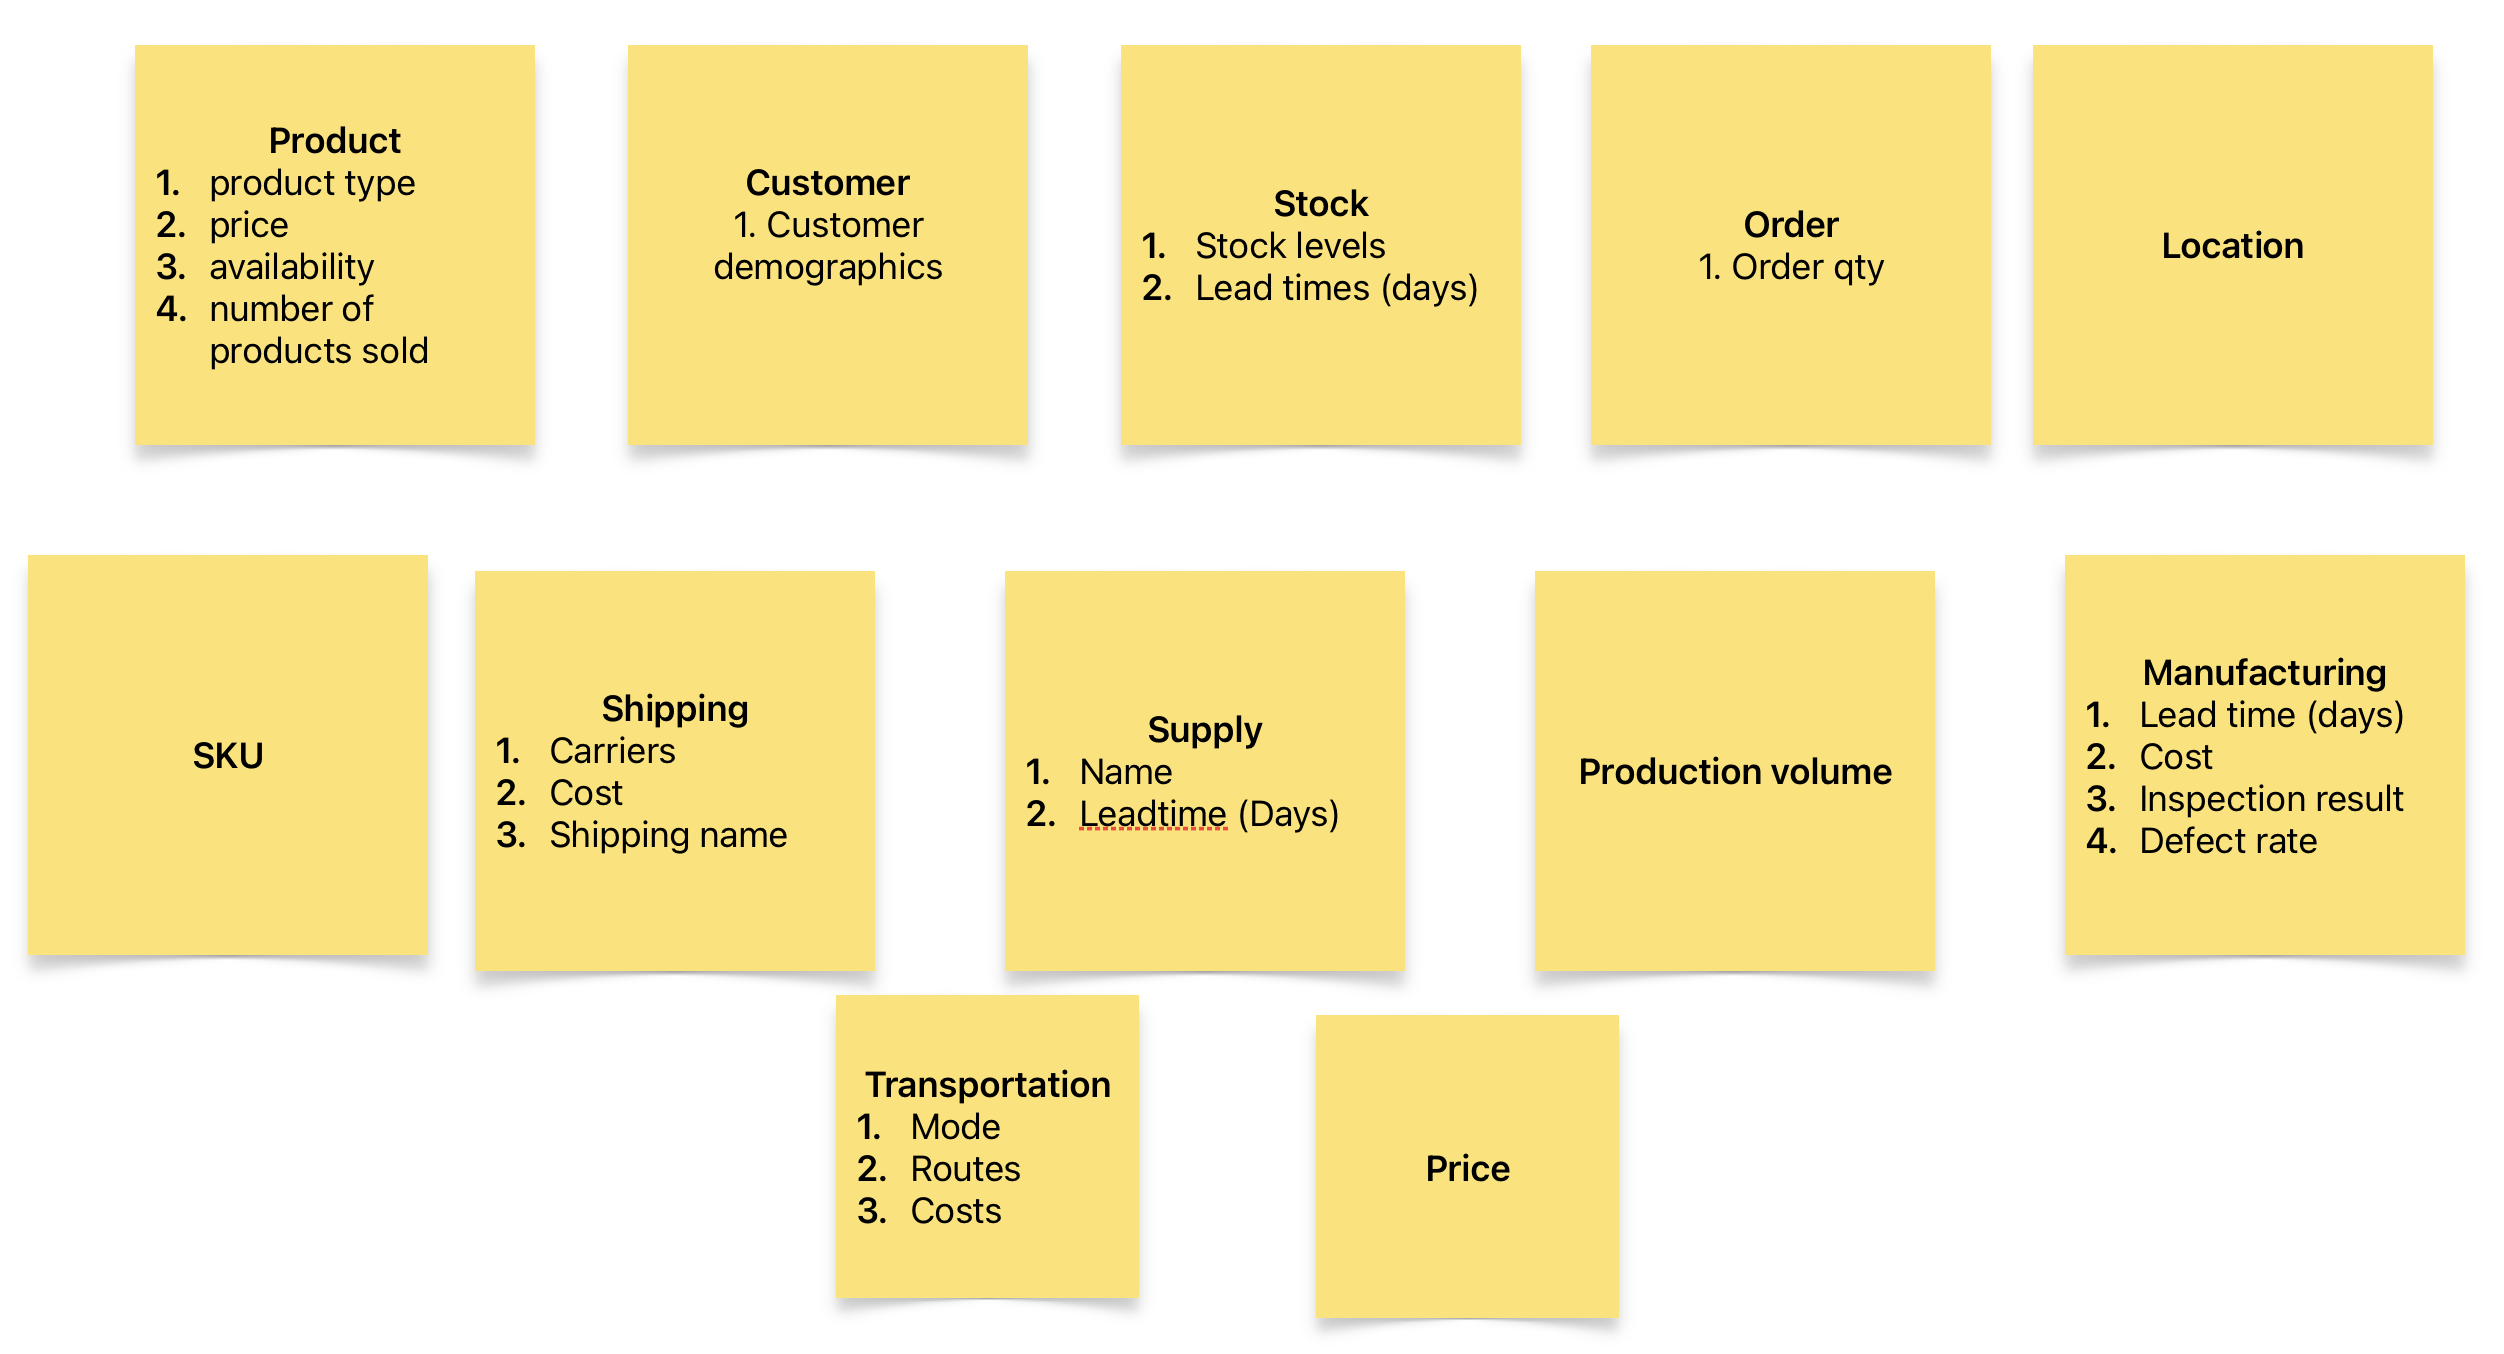

In [8]:
Image("Fields.png")

💡 Here is the possible grouping of fields which I can think of.<br>
💡 Some of the fields are not clear for me in the data set

## Field Analysis
<p> Let's understand the nature of data from this dataset.</p>

### product type

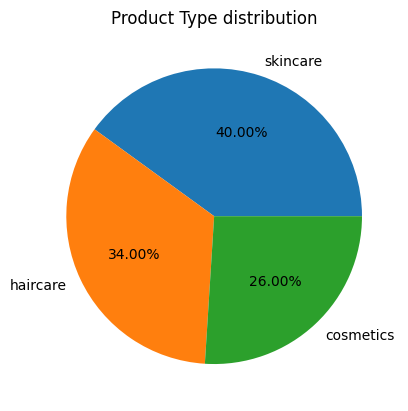

In [9]:
# Display product type distribution in the dataset.
pie_labels = df_input['Product type'].value_counts().index.to_list()
plt.pie(df_input['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

Product type mainly categorised into 3 types of products.
1. Skincare
2. Haircare
3. Cosmetics

Distribution these types shown above.

SKU - field is just an identifier for each item. <br>
There isn't much insights from this field.

### Price

In [10]:
# Price field value statistics
df_input['Price'].describe()

count    100.000000
mean      49.462461
std       31.168193
min        1.699976
25%       19.597823
50%       51.239831
75%       77.198228
max       99.171329
Name: Price, dtype: float64

Price ranges from 1.69 to 99.17

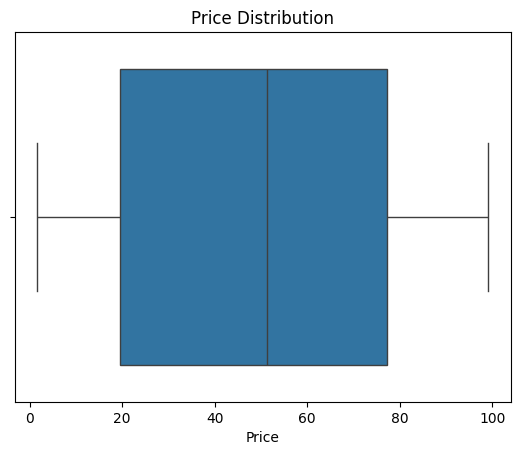

In [11]:
# Draw the box plot for Price distribution
sns.boxplot(data=df_input, x="Price").set_title('Price Distribution');

In [12]:
# Which product is having highest price ?
max_price = df_input["Price"].max()
df_input[df_input["Price"] == max_price]

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
14,skincare,SKU14,99.171329,26,562,8653.570926,Non-binary,54,29,78,...,Kolkata,25,558,14,5.791437,Pending,0.100683,Air,Route B,929.23529


In [13]:
# Which product having lowest price?
min_price = df_input['Price'].min()
df_input[df_input['Price'] == min_price]

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237


### Availability

count    100.000000
mean      48.400000
std       30.743317
min        1.000000
25%       22.750000
50%       43.500000
75%       75.000000
max      100.000000
Name: Availability, dtype: float64


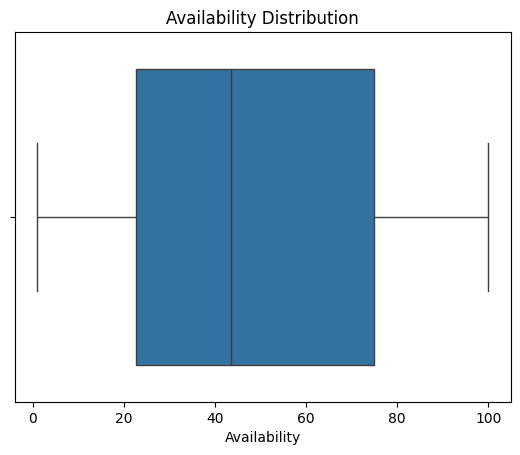

In [14]:
print (df_input['Availability'].describe());
sns.boxplot(data=df_input, x="Availability").set_title("Availability Distribution");

In [15]:
# Highest available products
df_input.sort_values("Availability", ascending=False).head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
19,skincare,SKU19,51.123870,100,187,2553.495585,Unknown,48,11,94,...,Chennai,20,694,16,82.373321,Fail,3.646451,Road,Route C,477.307631
84,haircare,SKU84,89.104367,99,618,2048.290100,Unknown,73,26,80,...,Chennai,24,589,22,33.808637,Pass,4.843457,Air,Route B,465.457006
42,skincare,SKU42,46.529168,98,155,1839.609426,Female,22,27,57,...,Bangalore,26,179,7,96.422821,Fail,4.939255,Road,Route A,635.657121
40,skincare,SKU40,80.541424,97,933,5724.959350,Female,90,20,39,...,Kolkata,18,793,1,88.179407,Pending,4.213269,Road,Route A,529.808724
94,cosmetics,SKU94,3.037689,97,987,7888.356547,Unknown,77,26,72,...,Delhi,12,908,14,60.387379,Pass,1.463607,Rail,Route B,846.665257


In [16]:
# Lowest available products
df_input.sort_values("Availability", ascending=True).head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
45,haircare,SKU45,33.784138,1,24,5267.956808,Male,93,7,52,...,Chennai,25,794,25,66.312544,Pass,3.219605,Rail,Route A,495.305697
52,skincare,SKU52,98.031830,1,820,9435.762609,Male,64,11,11,...,Mumbai,10,727,27,9.166849,Pending,2.122472,Air,Route C,602.898499
29,cosmetics,SKU29,63.447559,3,253,8318.903195,Female,45,5,67,...,Kolkata,16,329,7,39.292876,Pass,3.878099,Road,Route B,764.935376
37,skincare,SKU37,23.399845,5,963,2438.339930,Female,25,8,21,...,Kolkata,24,867,15,34.343277,Pending,2.610288,Sea,Route A,183.932968
13,skincare,SKU13,16.160393,5,249,4052.738416,Male,80,8,48,...,Bangalore,23,173,10,97.829050,Pending,1.631074,Road,Route B,547.241005


### Number of products sold

count    100.000000
mean     460.990000
std      303.780074
min        8.000000
25%      184.250000
50%      392.500000
75%      704.250000
max      996.000000
Name: Number of products sold, dtype: float64


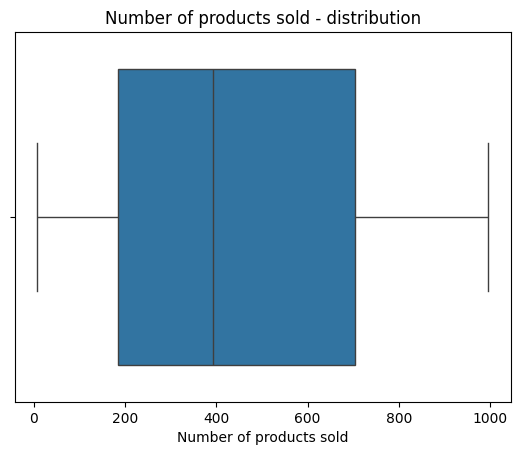

In [17]:
print (df_input['Number of products sold'].describe());
sns.boxplot(data=df_input, x="Number of products sold").set_title("Number of products sold - distribution");

### Revenue generated

count     100.000000
mean     5776.048187
std      2732.841744
min      1061.618523
25%      2812.847151
50%      6006.352023
75%      8253.976921
max      9866.465458
Name: Revenue generated, dtype: float64


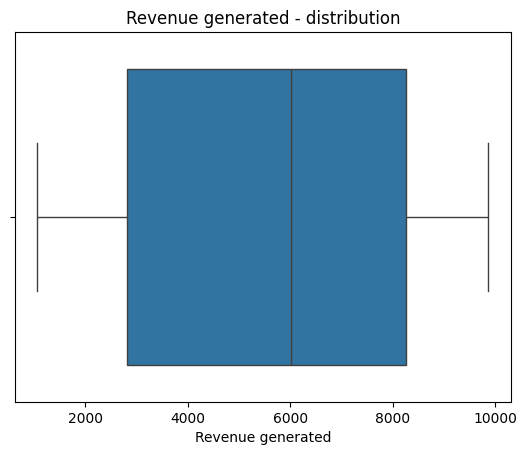

In [18]:
print (df_input['Revenue generated'].describe());
sns.boxplot(data=df_input, x="Revenue generated").set_title("Revenue generated - distribution");

In [19]:
# Observations having highest number of 'revenue generated'
df_input.sort_values('Revenue generated', ascending=False).head(3);

In [20]:
# Observations having lowest nuber of 'Revenue generated'
df_input.sort_values('Revenue generated').head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
59,cosmetics,SKU59,63.828398,30,484,1061.618523,Non-binary,100,16,26,...,Kolkata,11,176,4,1.900762,Fail,0.447194,Air,Route A,312.574274
86,skincare,SKU86,19.998177,18,223,1229.591029,Unknown,32,14,22,...,Mumbai,4,569,18,74.608970,Pass,2.051513,Rail,Route A,264.254890
78,haircare,SKU78,6.306883,50,946,1292.458418,Unknown,5,4,51,...,Mumbai,25,858,21,71.126515,Pending,4.096881,Sea,Route C,323.592203


### Customer demographics

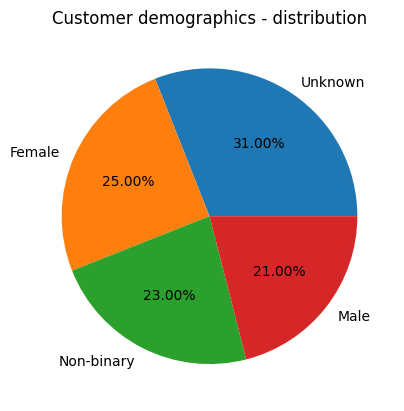

In [21]:
# Draw a plot for Customer demograohics
gender_labels = df_input['Customer demographics'].value_counts().index.to_list()
plt.pie(df_input['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

31% of the observations doesnt have the gender data.

### Stock levels

count    100.000000
mean      47.770000
std       31.369372
min        0.000000
25%       16.750000
50%       47.500000
75%       73.000000
max      100.000000
Name: Stock levels, dtype: float64


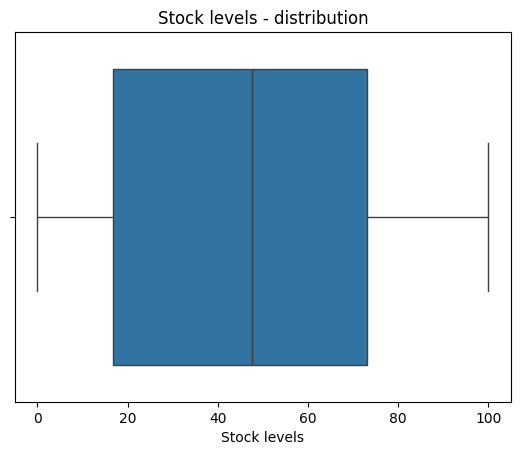

In [22]:
print (df_input['Stock levels'].describe());

# Draw the box plot distribution
sns.boxplot(data=df_input, x="Stock levels").set_title("Stock levels - distribution");

### Lead times

count    100.000000
mean      15.960000
std        8.785801
min        1.000000
25%        8.000000
50%       17.000000
75%       24.000000
max       30.000000
Name: Lead times, dtype: float64


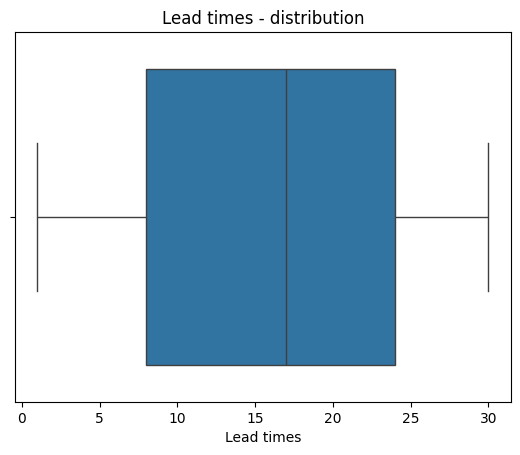

In [23]:
print (df_input['Lead times'].describe());
sns.boxplot(data=df_input, x='Lead times').set_title('Lead times - distribution');

### Order quantities

count    100.000000
mean      49.220000
std       26.784429
min        1.000000
25%       26.000000
50%       52.000000
75%       71.250000
max       96.000000
Name: Order quantities, dtype: float64


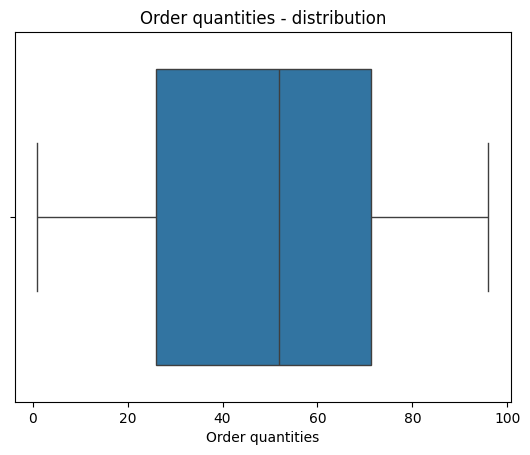

In [24]:
print (df_input['Order quantities'].describe());
sns.boxplot(data=df_input, x='Order quantities').set_title("Order quantities - distribution");

### Shipping times

count    100.000000
mean       5.750000
std        2.724283
min        1.000000
25%        3.750000
50%        6.000000
75%        8.000000
max       10.000000
Name: Shipping times, dtype: float64


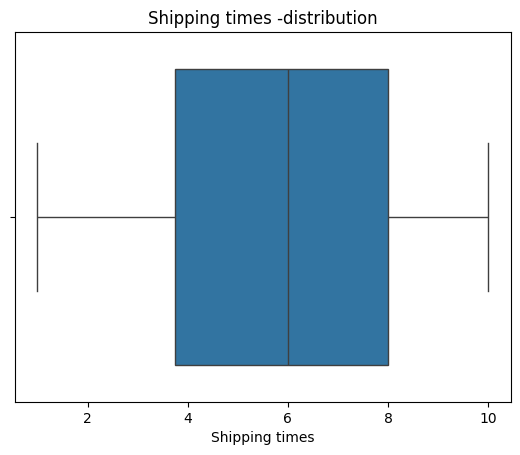

In [25]:
print(df_input['Shipping times'].describe());
sns.boxplot(data=df_input, x="Shipping times").set_title("Shipping times -distribution");

### Shipping carriers

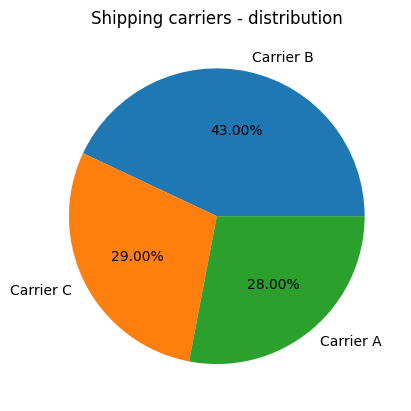

In [26]:
# Draw pie chart
carrier_labels = df_input['Shipping carriers'].value_counts().index.to_list()
plt.pie(df_input['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

### Shipping costs 

count    100.000000
mean       5.548149
std        2.651376
min        1.013487
25%        3.540248
50%        5.320534
75%        7.601695
max        9.929816
Name: Shipping costs, dtype: float64


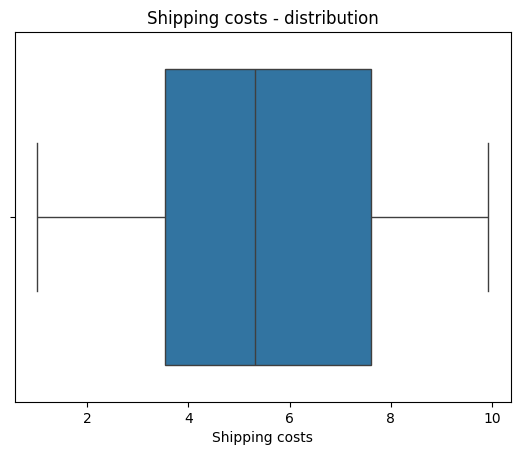

In [27]:
print (df_input['Shipping costs'].describe())
sns.boxplot(data=df_input, x="Shipping costs").set_title ("Shipping costs - distribution");

### Supplier name

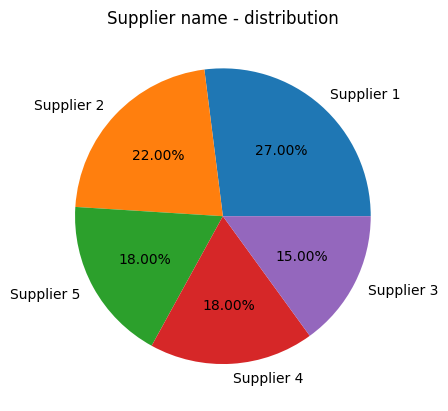

In [28]:
supplier_labels = df_input['Supplier name'].value_counts().index.to_list();
plt.pie(df_input['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');


### Location

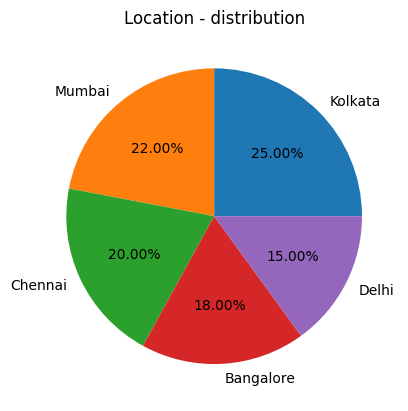

In [29]:
location_labels = df_input['Location'].value_counts().index.to_list()
plt.pie(df_input['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

### Lead time

count    100.000000
mean      17.080000
std        8.846251
min        1.000000
25%       10.000000
50%       18.000000
75%       25.000000
max       30.000000
Name: Lead time, dtype: float64


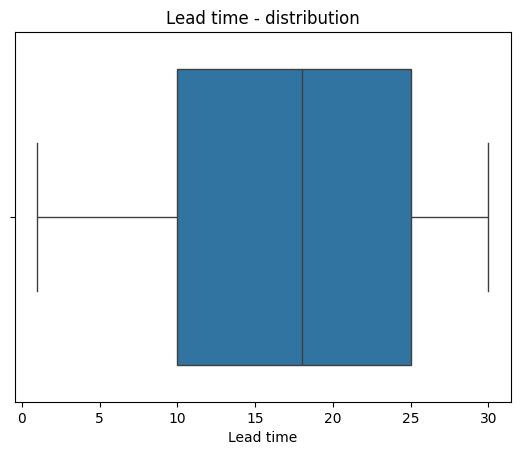

In [30]:
print (df_input['Lead time'].describe());
# Draw box plot
df_input['Lead time'].describe()
sns.boxplot(data=df_input, x="Lead time").set_title('Lead time - distribution');

### Production Volumes

count    100.000000
mean     567.840000
std      263.046861
min      104.000000
25%      352.000000
50%      568.500000
75%      797.000000
max      985.000000
Name: Production volumes, dtype: float64


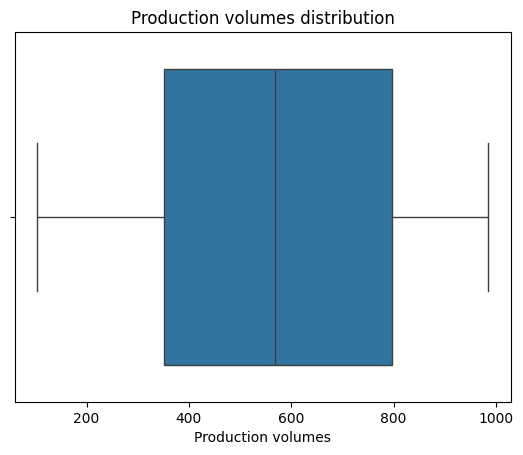

In [31]:
print (df_input['Production volumes'].describe());

# Draw boxplot
sns.boxplot(data=df_input, x="Production volumes").set_title("Production volumes distribution");

### Manufacturing lead time

count    100.00000
mean      14.77000
std        8.91243
min        1.00000
25%        7.00000
50%       14.00000
75%       23.00000
max       30.00000
Name: Manufacturing lead time, dtype: float64


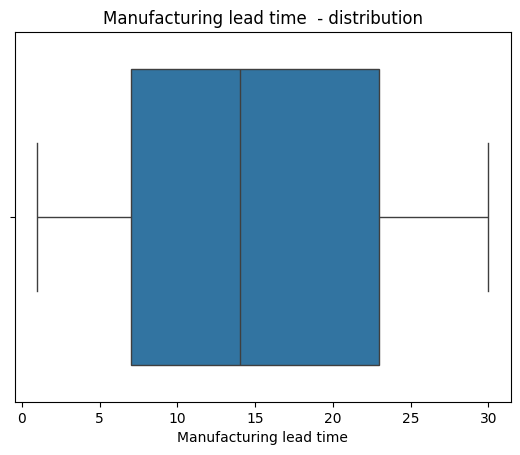

In [32]:
print (df_input['Manufacturing lead time'].describe());

# Draw the boxplot
sns.boxplot(data=df_input, x="Manufacturing lead time").set_title("Manufacturing lead time  - distribution");

### Manufacturing costs

count    100.000000
mean      47.266693
std       28.982841
min        1.085069
25%       22.983299
50%       45.905622
75%       68.621026
max       99.466109
Name: Manufacturing costs, dtype: float64


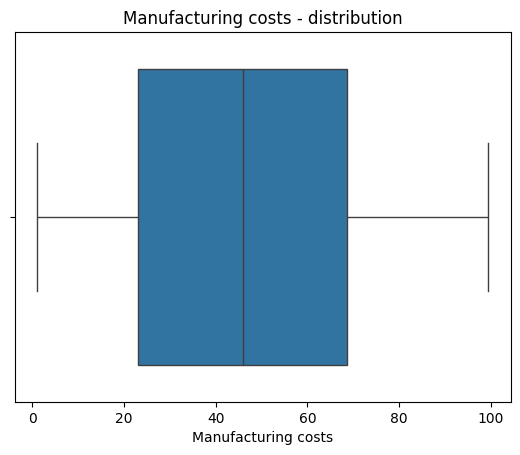

In [33]:
print (df_input['Manufacturing costs'].describe());

# Draw box plot
sns.boxplot(data=df_input, x="Manufacturing costs").set_title("Manufacturing costs - distribution");

### Inspection results

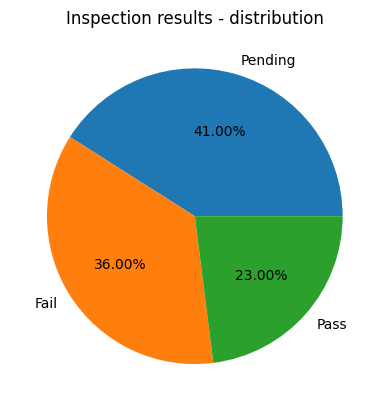

In [34]:
inspection_results_labels=df_input['Inspection results'].value_counts().index.to_list()

# Draw Pie chart
plt.pie(df_input['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

### Defect rates

count    100.000000
mean       2.277158
std        1.461366
min        0.018608
25%        1.009650
50%        2.141863
75%        3.563995
max        4.939255
Name: Defect rates, dtype: float64


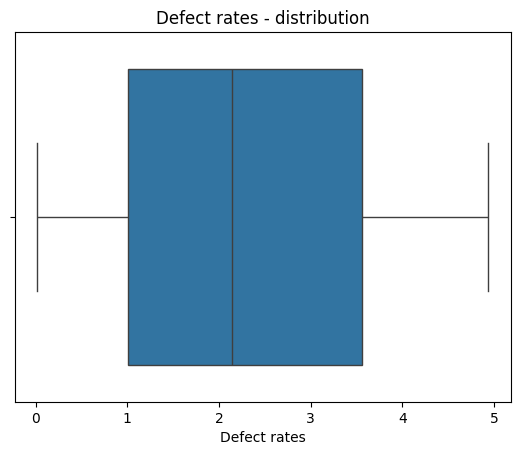

In [35]:
print(df_input['Defect rates'].describe());

# Draw box plot
sns.boxplot(data=df_input, x="Defect rates").set_title("Defect rates - distribution");

### Transportation modes

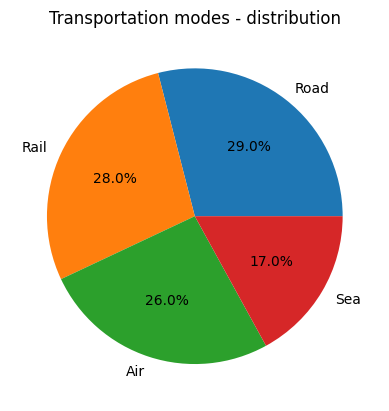

In [36]:
transportation_modes_labels=df_input['Transportation modes'].value_counts().index.to_list();

plt.pie(df_input['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

### Routes

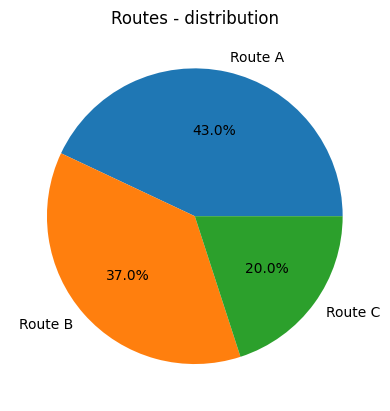

In [37]:
route_labels = df_input['Routes'].value_counts().index.to_list()

#Draw pie
plt.pie(df_input['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

### Costs

count    100.000000
mean     529.245782
std      258.301696
min      103.916248
25%      318.778455
50%      520.430444
75%      763.078231
max      997.413450
Name: Costs, dtype: float64


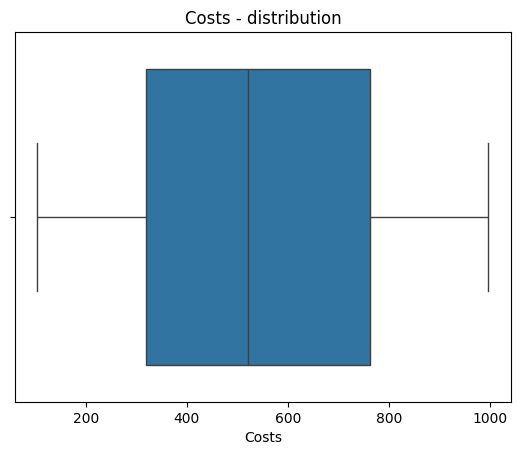

In [38]:
print(df_input['Costs'].describe());

# Draw the boxplot
sns.boxplot(data=df_input, x="Costs").set_title("Costs - distribution");

### Price

count    100.000000
mean      49.462461
std       31.168193
min        1.699976
25%       19.597823
50%       51.239831
75%       77.198228
max       99.171329
Name: Price, dtype: float64


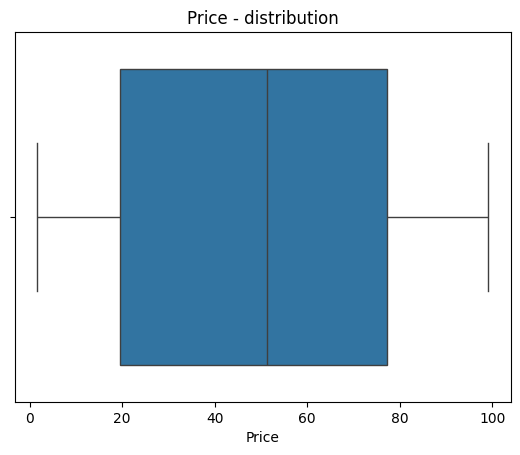

In [39]:
print(df_input['Price'].describe());

# Draw boxplot
sns.boxplot(data=df_input, x="Price").set_title("Price - distribution");

## Demand Forecasting

### Products having high demand

High demand can be calculated by the 'number of prodcucts sold' field.

In [40]:
# Observations having high number of 'sold products'
df_input[["Product type","SKU","Number of products sold","Location"]].sort_values("Number of products sold", ascending=False).head(5)

,Product type,SKU,Number of products sold,Location
10,skincare,SKU10,996,Kolkata
94,cosmetics,SKU94,987,Delhi
9,skincare,SKU9,980,Chennai
36,skincare,SKU36,963,Delhi
37,skincare,SKU37,963,Kolkata


💡It will be better to produce more quantities of top selling products, for satisfying the highest demand.

### Products having low demand ?

In [41]:
# Observations having lowest number of 'sold products'
df_input[["Product type","SKU","Number of products sold"]].sort_values("Number of products sold").head(5)

,Product type,SKU,Number of products sold
2,haircare,SKU2,8
45,haircare,SKU45,24
85,cosmetics,SKU85,25
48,haircare,SKU48,29
70,haircare,SKU70,32


💡Why the above products having low demand?<br>
💡Is it because any quality issues? <br>
💡Can companies further research to understand the reason for low selling ? <br>
💡Is it better to stop producing them and focus on more profitable items? <br>

## Location rankings based on 'Product selling'

In [42]:
# Extract required fields to seperate data frame
df_loc_product_sell = df_input[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

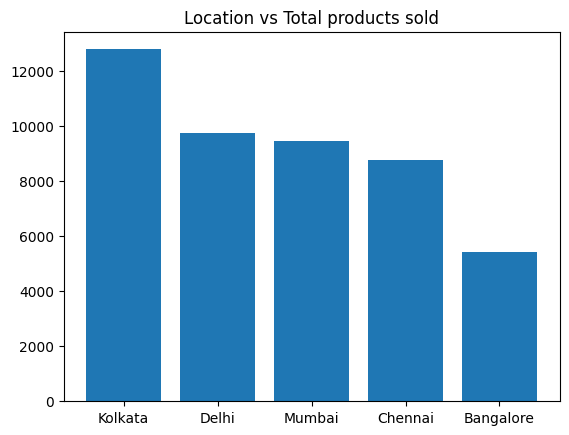

In [43]:
# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

💡Kolkata is a place having large selling market.<br>
💡Delhi, Mumbai and Chennai is having almost similar market.<br>
💡Bangalore having lowest selling of products. Companies needs to be understand why this city having less selling eventhough it's major city in the country. <br>
💡Does any more campaigns or advertisements is required for drawing the customers attention ?

## Average sales of each product type per location

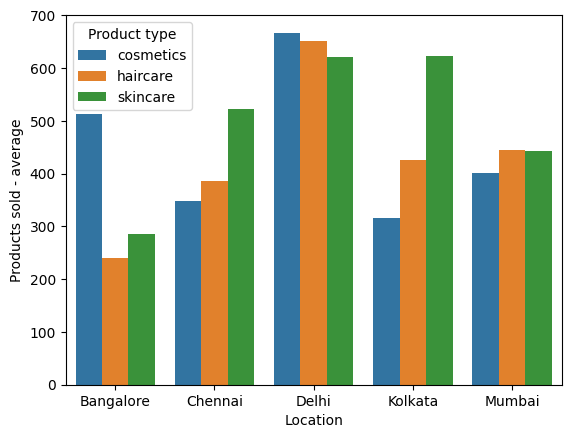

In [44]:
# Create seperate data frame with product type, number of products sold and location
df_product_type_location = df_input[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");

💡 Delhi is the location having highest average products sold for 3 product types.

## Product types having more defect rates

In [45]:
df_product_type_defect= df_input[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

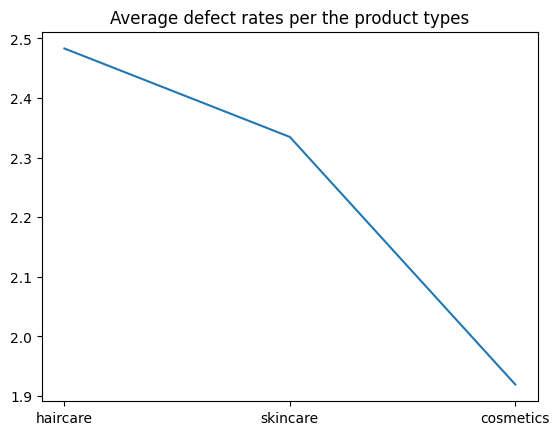

In [46]:
# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

💡
Average defect rates of hair care products are higher compared to skincare and cosmetics.<br>
💡
Can the production units/manufacturers do something to reduce defects of these products ?

## Transportation cost

What are the average costs of each transportation modes ? <br>
Which transportation having less costs ?

In [47]:
# Create a seperate data frame for Transportation cost analysis
df_transport_cost = df_input[["Product type", "Transportation modes", "Costs"]].copy()

# Segregate records based on the Transportation modes and find mean of each group
df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')

# rename the mean field
df_transport_cost.rename(columns={"Costs":"Avg Costs"}, inplace=True)

#Sort the records based on the mean cost value
df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)

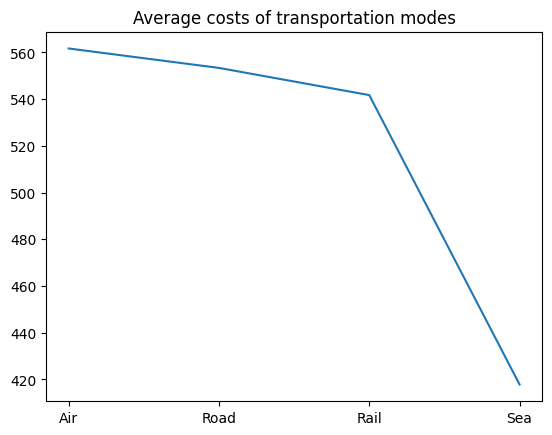

In [48]:
# Visualize the average values of each transportation
plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");

💡 From this dataset, its clear that Sea transport is cost budget friendly than rail, road and air. <br>
💡 As per our general understanding speed will be higher in air, hence the cost also will be higher.<br>
💡 Rail transport stays in between high and low budget rates. <br>
💡 We can decide the transport based on  the urgency and cost efficiency.

## Lead times of each product type per supplier

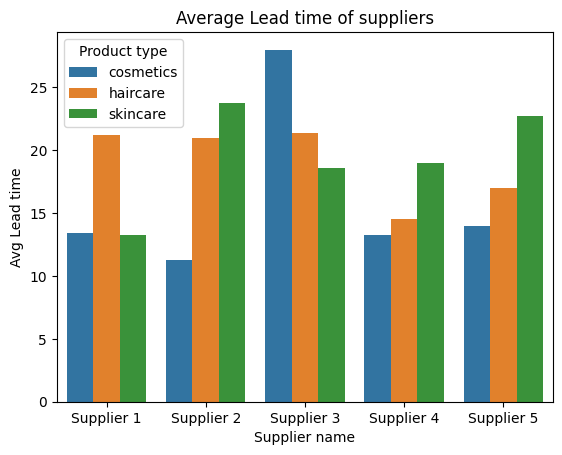

In [68]:
# Create new data frame
df_supplier_product_type = df_input[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");

💡 From above graph, we can compare the time required to supply each product type from various suppliers. <br>
💡 For instance, Supplier 3 takes highest time in supplying 'Cosmetics' item than any other supplier. So as a business we may re-think before ordering Cosmetics item from supplier 3.